In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.cvtColor(cv2.imread('doberman.jpg'), cv2.COLOR_BGR2RGB)

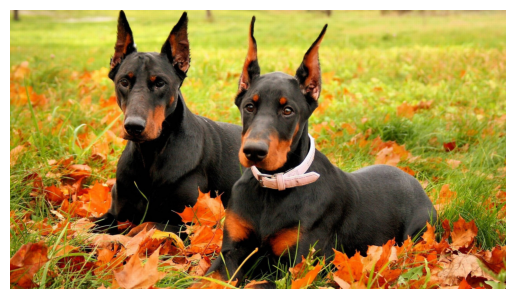

In [3]:
plt.axis('off')
plt.imshow(img)

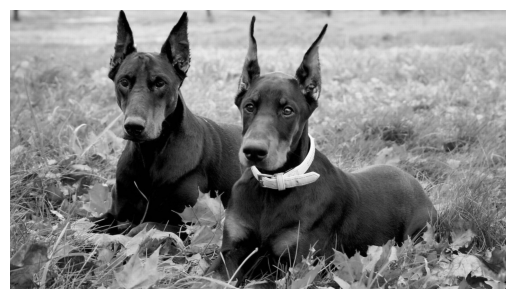

In [4]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.axis('off')
plt.imshow(gray_img, cmap='gray')

### Sobel filter

In [5]:
kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

In [6]:
sobel_x = cv2.filter2D(gray_img, -1, kernel_x)
sobel_y = cv2.filter2D(gray_img, -1, kernel_y)
sobel = sobel_x + sobel_y

(-0.5, 1919.5, 1079.5, -0.5)

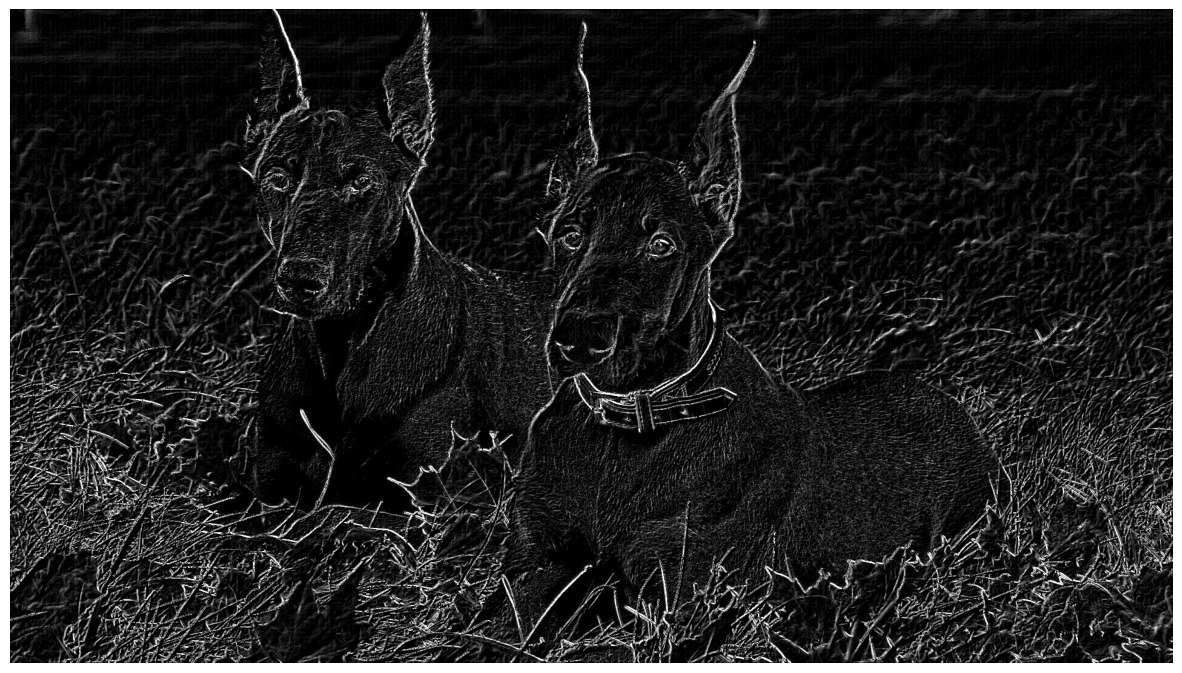

In [7]:
plt.figure(figsize=(15, 20))
plt.imshow(sobel, cmap='gray')
plt.axis('off')

### HOG

In [10]:
from skimage.feature import hog
from skimage import data, exposure

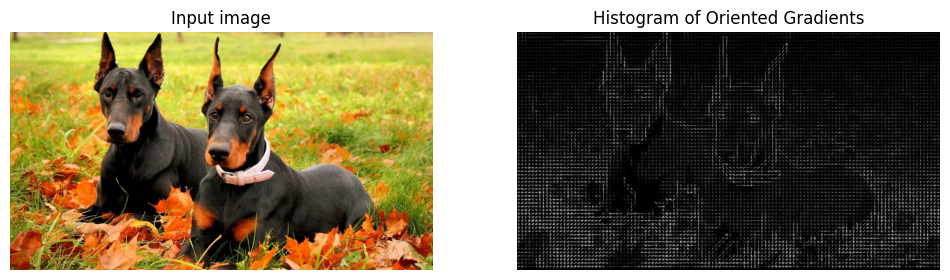

In [11]:
fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()